In [ ]:
"""
My project utilized the dataset (Boat type classification dataset) from the MS: AI Deep Learning Specialization, using Python programming 
with Simplilearn as well as Kaggle.  The goal of this work is to show my coding skills with results using the dataset related to the
(Boat type classification Analysis) project.

"""

In [ ]:
"""

Objectives: 

•	use AI with deep learning methods for automate port operations. 
•	Make a Convolutional Neural Network (CNN) model 
•	Train the CNN model to classify test images.
•	implement a MobileNetV2 model to classify test images.
•	use performance metrics such as confusion matrix, classification report, accuracy, loss, precision, and recall for models’ evaluation.
•	Prepare the trained models for possible application on various capacity-limited devices such as mobile and hardware. 

"""

In [ ]:
#  Artificial_Intelligence_Data Science_Deep_Learning_Automating_Port_Operations_Keras_Tensorflow


## Build a CNN network to classify the boat

In [1]:
# use the "os" module to locate the data file
import os

dataset_folder = "boat_type_classification_dataset"

# list the items in the dataset_folder
print("items in the dataset_folder:", os.listdir(dataset_folder))

print("\n")

# give path for the "Train" folder which is inside the dataset_folder 
train_folder_path = os.path.join(dataset_folder, "Train")

# list the items in the train_folder_path
print("items in the train_folder_path:", os.listdir(train_folder_path))

print("\n")

total_items = 0


# see the number of items in the list
for i in  os.listdir(train_folder_path):
    i_path = os.path.join(train_folder_path, i)
    number_elements = len(os.listdir(i_path))
    print(f"{i}: {number_elements} components")
    total_items += number_elements

print("\n")

# total images
print("total images in the Train folder:", total_items)


items in the dataset_folder: ['test', 'Train']


items in the train_folder_path: ['buoy', 'cruise_ship', 'ferry_boat', 'freight_boat', 'gondola', 'inflatable_boat', 'kayak', 'paper_boat', 'sailboat']


buoy: 53 components
cruise_ship: 191 components
ferry_boat: 63 components
freight_boat: 23 components
gondola: 193 components
inflatable_boat: 16 components
kayak: 203 components
paper_boat: 31 components
sailboat: 389 components


total images in the Train folder: 1162


In [3]:
# load training dataset from "Train" folder usong "image_dataset_from_directory"
from tensorflow.keras.preprocessing import image_dataset_from_directory

training_dataset = image_dataset_from_directory(
    os.path.join(dataset_folder, "Train"),
    labels = "inferred",           # label such as 0, 1, 2, 3, --- to folders under "Train" folder
    label_mode = "categorical",     # it gives one hot encoded vectors. 
    image_size = (128, 128),
    batch_size = 32,               # move forward only 32 images in each batch
    shuffle = True,
    seed = 43,              # set uncertainty 
    validation_split = 0.2,   # 20% for validation data, and 80% for training data
    subset = "training"
)
    


Found 1162 files belonging to 9 classes.
Using 930 files for training.


In [5]:

# 9 classes { ['buoy', 'cruise_ship', 'ferry_boat', 'freight_boat', 'gondola', 'inflatable_boat', 'kayak', 'paper_boat', 'sailboat']} for 
# map 0, 1, 2, 3, 4, 5, 6, 7, 8

# since  label_mode = "categorical", Tensorflow uses a one hot encoded vector of 9 length. For example  [0. 1. 0. 0. 0. 0. 0. 0. 0.] for "cruise_ship"

for img, labe in training_dataset.take(1):
    print("shape of image:", img.shape)         # example, (32 batch images), 128 by 128 (image size), 3 (RGB colors). 
    print("shape of labels:", labe.shape)      # it gives (32, 9) where batch labels = 32, and  vector length = 9 from one hot vector called 9 dimensions
    print("one hot encoded labels for class:", labe.numpy())

shape of image: (32, 128, 128, 3)
shape of labels: (32, 9)
one hot encoded labels for class: [[0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0.

In [7]:
# input validation dataset from "Train" folder usong "image_dataset_from_directory"

validation_dataset_1 = image_dataset_from_directory(
    os.path.join(dataset_folder, "Train"),
    labels = "inferred",           
    label_mode = "categorical",     
    image_size = (128, 128),
    batch_size = 32,               
    shuffle = True,
    seed = 43,                     
    validation_split = 0.2,        # 20% (validation data) from the "Train" folder
    subset = "validation"           # validation data
)


Found 1162 files belonging to 9 classes.
Using 232 files for validation.


In [9]:
# check

import tensorflow

# number of training batches
print("number of training batches:", tensorflow.data.experimental.cardinality(training_dataset).numpy())
# it gives 30 batches (training data (930 images) /(number (32) of images in rach batch) )

print("\n")

# number of validation batches
print("number of validation batches:", tensorflow.data.experimental.cardinality(validation_dataset_1).numpy())
# it gives 7.25 batches (validatio data (232 images) /(number (32) of images in rach batch) )



number of training batches: 30


number of validation batches: 8


['buoy', 'cruise_ship', 'ferry_boat', 'freight_boat', 'gondola', 'inflatable_boat', 'kayak', 'paper_boat', 'sailboat']




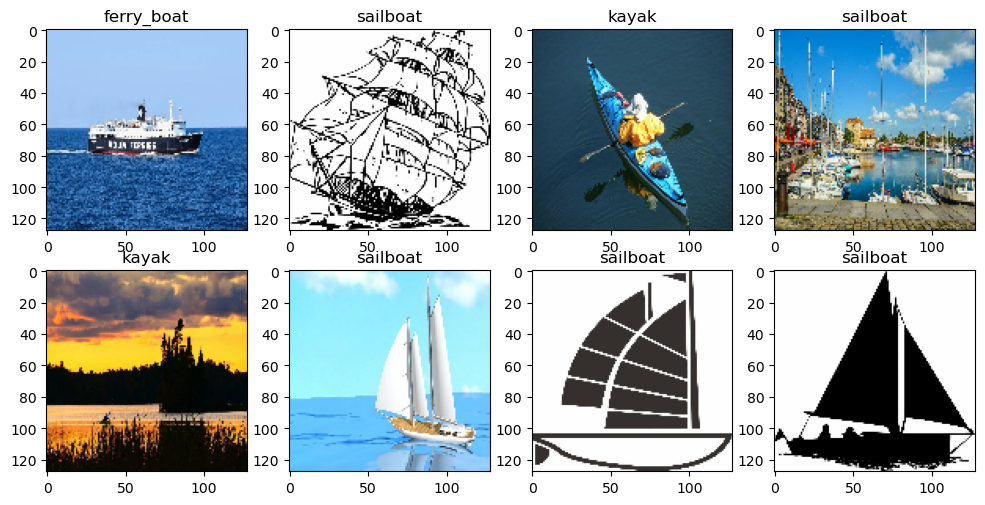

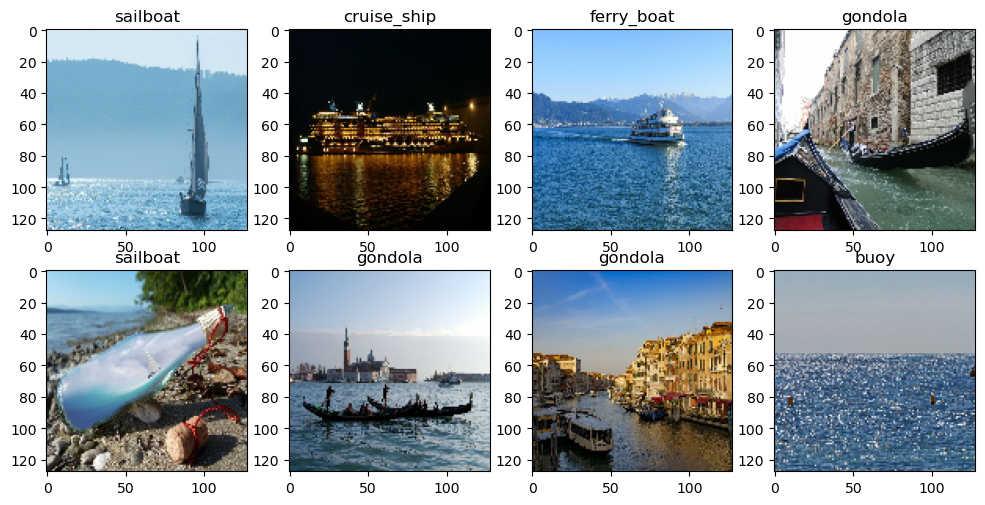

In [11]:
# see some validation images

import matplotlib.pyplot as plt
training_dataset_class = training_dataset.class_names
print(training_dataset_class)

print("\n")

# look at 2 batches from validation_dataset

for img, labls in validation_dataset_1.take(2):
    plt.figure(figsize = (12, 12))
    for sample in range(8):
        ax = plt.subplot(4, 4, sample + 1)
        plt.imshow(img[sample].numpy().astype("uint8"))
        training_dataset_class_index = labls[sample].numpy().argmax()
        plt.title(training_dataset_class[training_dataset_class_index])


In [13]:
# Do normalization for images
from tensorflow.keras import layers
# make a  normalization layer used to change each image pixel from [0, 255] to [0, 1]
normalized_images_layer = layers.Rescaling(1./255)   # each pixelnumber / 255. # it can go from 0 to 1 (pixel values). 
print(normalized_images_layer)

<Rescaling name=rescaling, built=False>


In [15]:
# use normalization to the training dataset
training_dataset_normalization = training_dataset.map(lambda i, l: (normalized_images_layer(i), l))
# it gives normalized images with raw labels
print(training_dataset_normalization )

<_MapDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 9), dtype=tf.float32, name=None))>


shape of image: (32, 128, 128, 3)
shape of labels: (32, 9)


image, pixel range: 0.0 -- 1.0


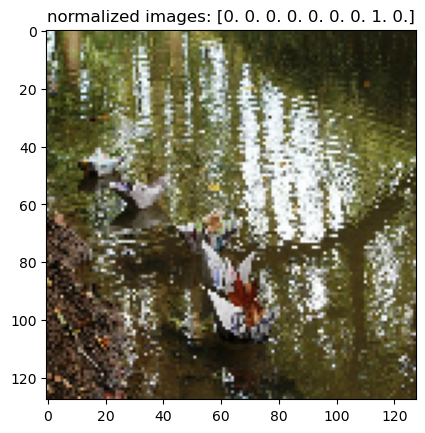

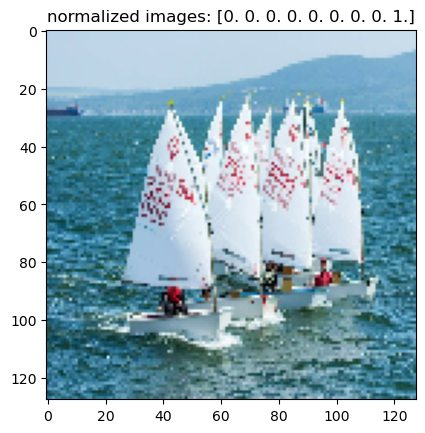

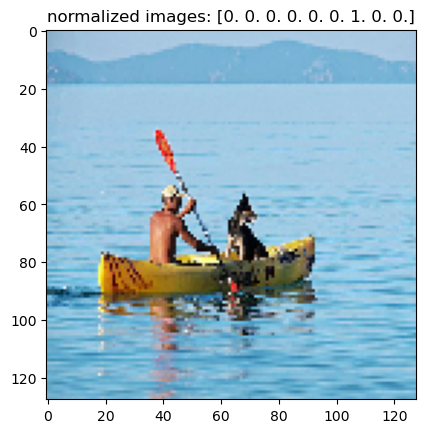

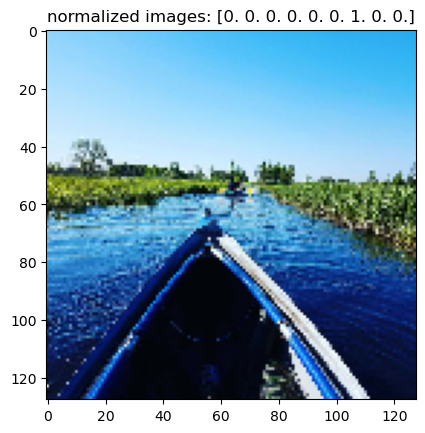

In [17]:
# see some normalized images with labels. 

for image, label in training_dataset_normalization.take(1):   # taking one batch
    print("shape of image:",  image.shape)     
    print("shape of labels:", label.shape)  
    print("\n")
    print("image, pixel range:",   image[0].numpy().min(), "--", image[0].numpy().max())
    # see only first 4 images
    for a in range(4):
        plt.imshow(image[a].numpy())
        plt.title(f"normalized images: {label[a].numpy()}")
        plt.show()



## make a CNN network using Keras

In [19]:
# create cnn sequential model 

from tensorflow.keras import models

cnn_sequential_model = models.Sequential([
    # input block 
    layers.Input(shape = (128, 128, 3)),   
    
    # first hidden layer
    layers.Conv2D(32, (3, 3), activation = "relu"),  # Cov2D with 32 filters, kernel size 3,3, and activation relu.
    # decrease image size
    layers.MaxPooling2D(),
    
    #second hidden layer
    layers.Conv2D(32, (3, 3), activation = "relu"),
    layers.MaxPooling2D(),

    # take average for each feature
    layers.GlobalAveragePooling2D(),

    # Use dense layers
    layers.Dense(128, activation = "relu"),
    layers.Dense(128, activation = "relu"),
    
    # output layer
    layers.Dense(9, activation = "softmax")  # 9 neurons, each class with one neuron
                                                                                                             
])

# Assemble the model for optimization

cnn_sequential_model.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy", tensorflow.keras.metrics.Precision(), tensorflow.keras.metrics.Recall()]
)

cnn_sequential_model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 32)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,041 (125.16 KB)

 Trainable params: 32,041 (125.16 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
,# use the cnn sequential model to fit the training dataset
cnn_sequential_model_fit_training_dataset = cnn_sequential_model.fit(
    training_dataset,        # first train the training_dataset within each epoch
    validation_data = validation_dataset_1,    # after each epoch, use validation_dataset_1 to test the model
    epochs = 25
)
  

Epoch 1/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.2262 - loss: 9.3372 - precision: 0.2167 - recall: 0.1763 - val_accuracy: 0.2974 - val_loss: 2.1560 - val_precision: 0.4455 - val_recall: 0.1940
Epoch 2/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 627ms/step - accuracy: 0.3361 - loss: 1.9333 - precision: 0.4906 - recall: 0.0955 - val_accuracy: 0.3448 - val_loss: 1.8810 - val_precision: 0.5417 - val_recall: 0.1121
Epoch 3/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 664ms/step - accuracy: 0.3992 - loss: 1.7407 - precision: 0.5892 - recall: 0.1649 - val_accuracy: 0.3922 - val_loss: 1.7330 - val_precision: 0.4722 - val_recall: 0.0733
Epoch 4/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 328ms/step - accuracy: 0.4015 - loss: 1.6625 - precision: 0.6562 - recall: 0.1884 - val_accuracy: 0.3879 - val_loss: 1.7224 - val_precision: 0.5000 - val_recall: 0.0216
Epoch 5/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 750ms/step - accuracy: 0.4038 - loss: 1.6826 - precision: 0.5186 - recall: 0.1118 - val_accuracy: 0.3362 - val_loss: 

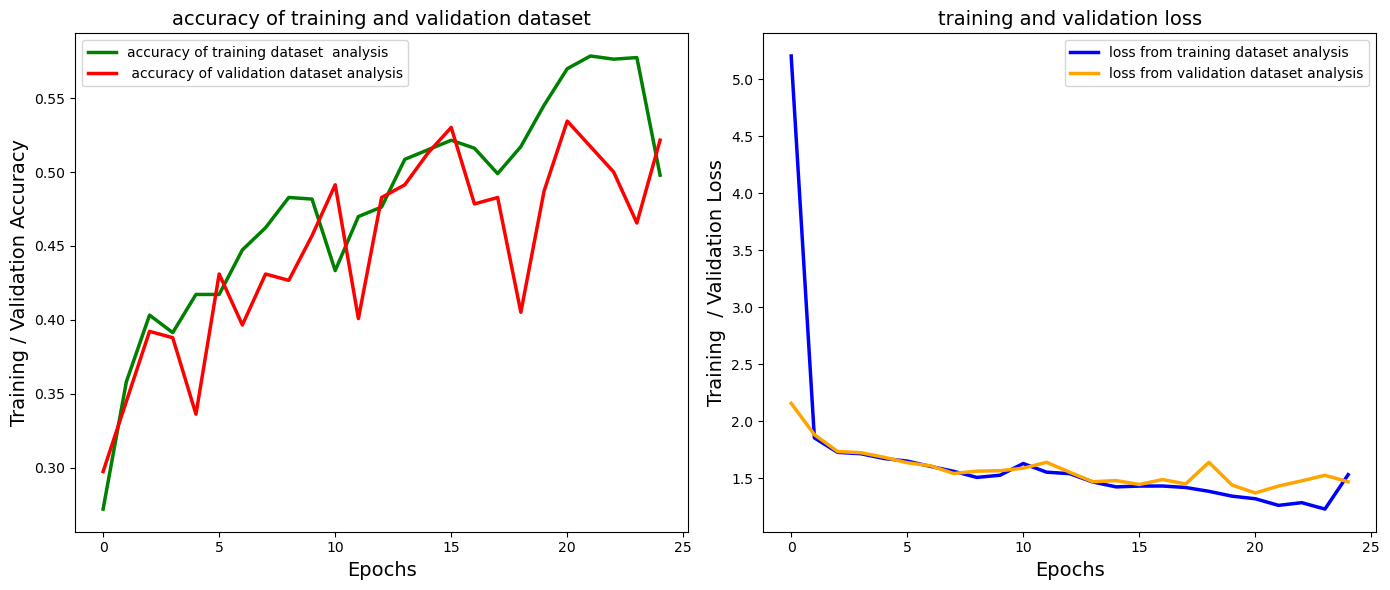

In [25]:
# plot fitted model history (training dataset accuracy as a function of epochs, and validation dataset accuracy as epochs)

import matplotlib.pyplot as plt


plt.figure(figsize = (14, 6))

plt.subplot(1, 2, 1)
plt.plot(cnn_sequential_model_fit_training_dataset.history["accuracy"], label = "accuracy of training dataset  analysis",  linewidth = 2.5, 
         color = "green")

plt.plot(cnn_sequential_model_fit_training_dataset.history["val_accuracy"], label = " accuracy of validation dataset analysis", linewidth = 2.5, 
         color = "red")
plt.title("accuracy of training and validation dataset", fontsize = 14)

plt.xlabel("Epochs", fontsize = 14)
plt.ylabel("Training / Validation Accuracy", fontsize = 14)
plt.legend()
plt.tight_layout()

# plot fit model history (training loss as a function of epochs, and validation loss as epochs)

plt.subplot(1, 2, 2)
plt.plot(cnn_sequential_model_fit_training_dataset.history["loss"], label = "loss from training dataset analysis ",  linewidth = 2.5,  color = "blue")

plt.plot(cnn_sequential_model_fit_training_dataset.history["val_loss"], label = "loss from validation dataset analysis",  linewidth = 2.5, 
         color = "orange")
plt.title("training and validation loss", fontsize = 14)

plt.xlabel("Epochs", fontsize = 14)
plt.ylabel("Training  / Validation Loss", fontsize = 14)
plt.legend()
plt.tight_layout()

plt.show()


In [28]:
# Examine the cnn_sequential_model efficiency with  validation_dataset_1


In [27]:
loss, accuracy, precision, recall =cnn_sequential_model.evaluate(validation_dataset_1)

print(f"loss from validation data analysis: {loss:.3f}")
print("\n")
print(f"accuracy from validation data analysis : {accuracy:.2f}")
print("\n")
print(f"precision from from validation data analysis: {precision:.2f}")
print("\n")
print(f"recall from from validation data analysis: {recall:.2f}")


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 278ms/step - accuracy: 0.5257 - loss: 1.4518 - precision: 0.6760 - recall: 0.1917
loss from validation data analysis: 1.467


accuracy from validation data analysis : 0.52


precision from from validation data analysis: 0.64


recall from from validation data analysis: 0.19


In [29]:
# do predictions using model
# look at true values from validation_dataset_1
import numpy as np
# see only the labels, and get numpy array like [0, 0, 0, 0, 1, 0, 0, 0, 0], ----
y_validation_dataset_1_true = np.concatenate([b for a, b in validation_dataset_1], axis = 0)   # a = images, and b = labels

# predicted values from images in the validation_dataset_1
# Give validation into cnn_sequential_model and predict images like (new predicted images, 9 components os a row vector summed as 1)

y_predictions = cnn_sequential_model.predict(validation_dataset_1)
#print(y_predictions)

print("\n")

# see 9 components os a row vector and summed them we can get 1
for x in range(3):
    print(f"y_predictions_for {x+1}: {y_predictions[x]}")
    print(f"y_predictions_sum {x+1}: {np.sum(y_predictions[x]):.1f}")
    
print("\n")

#  change predicted values to predicted class items
# take the maximum probability from 9 values in a row vector that gives predicted class. 
y_predicted_classes_items = np.argmax(y_predictions, axis = 1)
print("y_predicted_classes_items:", y_predicted_classes_items.shape)

print("\n")

# change y_validation_dataset_1_true into class items
y_validation_dataset_1_true_items = np.argmax(y_validation_dataset_1_true, axis = 1)  # maximum value out og 9 values in a row provides class index. 
# row value like [0, 0, 0, 1, 0, 0, 0, 0, 0] for class 3

print("sample numbers in the validation dataset:", y_validation_dataset_1_true_items)


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 220ms/step


y_predictions_for 1: [0.01597823 0.04579046 0.03053698 0.02346375 0.01602723 0.00809444
 0.16291359 0.06269833 0.63449705]
y_predictions_sum 1: 1.0
y_predictions_for 2: [0.01899832 0.4703877  0.05176229 0.02883175 0.04488973 0.00849536
 0.04554063 0.00486676 0.32622743]
y_predictions_sum 2: 1.0
y_predictions_for 3: [0.02169295 0.40612754 0.04034034 0.04956527 0.20592237 0.01135498
 0.07878993 0.01042914 0.1757775 ]
y_predictions_sum 3: 1.0


y_predicted_classes_items: (232,)


sample numbers in the validation dataset: [8 4 8 8 6 1 8 3 4 8 0 1 8 6 1 8 8 6 2 8 6 8 1 6 2 4 8 0 6 4 8 8 8 8 6 6 4
 4 0 1 4 8 3 2 4 8 8 0 1 1 1 8 8 2 6 8 8 8 5 2 8 4 1 6 4 8 1 2 8 8 8 2 6 1
 6 6 8 4 8 6 4 8 3 1 4 7 4 8 4 4 1 6 8 8 2 1 1 1 8 8 6 1 4 4 4 1 6 8 0 1 6
 4 4 1 6 0 6 1 1 6 2 6 1 6 0 8 4 8 0 8 1 6 8 1 1 4 4 8 8 1 3 6 6 6 6 6 2 8
 1 8 8 1 6 6 1 0 4 1 4 6 7 1 8 7 8 6 4 1 8 8 6 0 6 1 8 8 6 0 2 8 8 1 4 4 2
 8 8 2 8 6 1 8 1 4 4 1 0 1 8 8 8 6 5 1 6 1 1 6 1 6 8 8 2 8 6

In [31]:
# find a confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix_validation = confusion_matrix(y_validation_dataset_1_true_items, y_predicted_classes_items)
print("confusion_matrix_validation:", confusion_matrix_validation)  

# true clas along X-axis and model's predicted class along Y-axis. 
#confusion matrix has 81 elements


confusion_matrix_validation: [[ 0  1  0  0  3  0  5  0  4]
 [ 0  8  0  0  9  0  9  0 21]
 [ 0  2  0  0  5  0  3  0  5]
 [ 0  2  0  0  0  0  0  0  2]
 [ 0 11  0  0  4  0  5  0 14]
 [ 0  0  0  0  0  0  0  0  2]
 [ 0  3  0  0 12  0  4  0 25]
 [ 0  0  0  0  0  0  0  0  3]
 [ 1 17  0  0  8  0 11  0 33]]


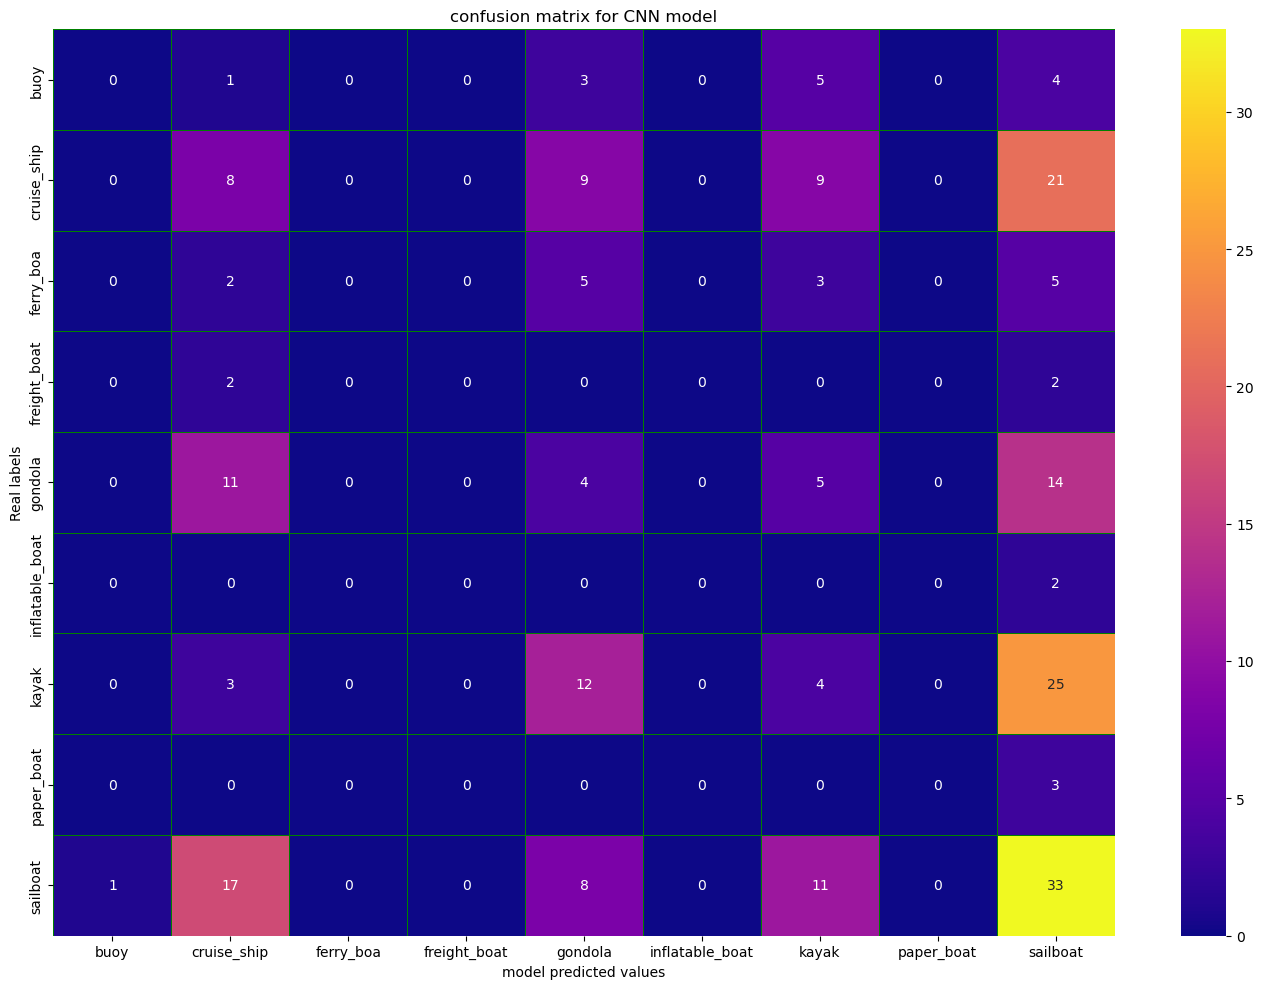

In [33]:

# Visualize confusion matrix

classes_boats = ["buoy", "cruise_ship", "ferry_boa", "freight_boat", "gondola", "inflatable_boat", "kayak", "paper_boat", "sailboat"]

import seaborn as sns
plt.figure(figsize = (14, 10))

sns.heatmap(confusion_matrix_validation, fmt = "d", annot = True, cmap = "plasma", linecolor = "green",
            linewidths = 0.4, xticklabels = classes_boats, yticklabels = classes_boats)

plt.title ("confusion matrix for CNN model")
plt.xlabel("model predicted values")
plt.ylabel("Real labels")
plt.tight_layout()
plt.show()

In [35]:
# look at classification report

from sklearn.metrics import classification_report

print(classification_report(y_validation_dataset_1_true_items, y_predicted_classes_items, zero_division = 0 ))

#  get zero_division = 0  if thee is no predicted class


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.18      0.17      0.18        47
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00         4
           4       0.10      0.12      0.11        34
           5       0.00      0.00      0.00         2
           6       0.11      0.09      0.10        44
           7       0.00      0.00      0.00         3
           8       0.30      0.47      0.37        70

    accuracy                           0.21       232
   macro avg       0.08      0.09      0.08       232
weighted avg       0.16      0.21      0.18       232



## Build a lightweight model with the aim of deploying the solution on a mobile device using transfer learning. 


In [41]:
# use any lightweight pre-trained model as the initial (first) layer.
# MobileNetV2 is a popular lightweight pre-trained model built using Keras API. 

In [37]:
# load training dataset from "Train" folder usong "image_dataset_from_directory"

training_dataset_mobilenetv2 = image_dataset_from_directory(
    os.path.join(dataset_folder, "Train"),
    labels = "inferred",          
    label_mode = "categorical",      
    image_size = (128, 128),
    batch_size = 32,             
    shuffle = True,               #  select the dataset from shuffle 
    seed = 43,             
    validation_split = 0.3,       # 30% of the dataseet is validation
    subset = "training"           #  70% (814 out of 1162) of the dataseet is training. 
)

Found 1162 files belonging to 9 classes.
Using 814 files for training.


In [39]:
 # input validation dataset from "Train" folder usong "image_dataset_from_directory"

validation_dataset_mobilenetv2 = image_dataset_from_directory(
    os.path.join(dataset_folder, "Train"),
    labels = "inferred",           
    label_mode = "categorical",     
    image_size = (128, 128),
    batch_size = 32,               
    shuffle = True,
    seed = 1,                     
    validation_split = 0.3,        
    subset = "validation"       # 30% of the dataseet is validation
)


Found 1162 files belonging to 9 classes.
Using 348 files for validation.


In [41]:
# Do normalization to change each image pixel from [0, 255] to [0, 1]

# use normalization to the training dataset
training_dataset_mobilenetv2 = training_dataset_mobilenetv2.map(lambda c, d: (c/255.0, d))
# c is (batch_size, image_size, 3), and d is (batch_size, 9). 


# use normalization to the validation dataset
validation_dataset_mobilenetv2 = validation_dataset_mobilenetv2.map(lambda c, d: (c/255.0, d))


## make MobileNetV2 model

In [43]:
# load MobileNetV2
from tensorflow.keras.applications import MobileNetV2

# form mobilenetv2_model

mobilenetv2_model = MobileNetV2(input_shape = (128, 128, 3), include_top = False, alpha = 0.5, weights = "imagenet")

# fix the model
mobilenetv2_model.trainable = False   # do not change weights in the mobilenetv2_model while training. 


In [45]:
# make a mobile device model 
mobile_device_model = models.Sequential([
    mobilenetv2_model,          # Already defined  #  Light Model as the first layer (fixed)
    
    layers.GlobalAveragePooling2D(),       # each image has one vector. 
    layers.Dropout(0.2),                   # drop 20% neurons during training 

    layers.Dense(256, activation = "relu"),     # use 256 neurons with  activation as "relu"   
    layers.BatchNormalization(),                #  normalize this layer and make readyness for the next layer. 
    layers.Dropout(0.1),                        # drop 10% neurons during training to stop overfitting. 
    
    layers.Dense(128, activation = "relu"),     # define a layer (128 neurons )
    layers.BatchNormalization(),
    layers.Dropout(0.1),

     layers.Dense(9, activation = "softmax")     # final layer with 9 classes with activation = "softmax" used to find probabilities in each clsss
                                                                                                             
])


In [47]:
# compile the model

prec = tensorflow.keras.metrics.Precision()

rec = tensorflow.keras.metrics.Recall()

mobile_device_model.compile( optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy", prec, rec])

mobile_device_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_0.50_128            │ (None, 4, 4, 1280)     │       706,224 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,069,753 (4.08 MB)

 Trainable params: 362,761 (1.38 MB)

 Non-trainable params: 706,992 (2.70 MB)

In [49]:
# Use earlystopping
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor = "val_loss",   # observe the validation loss           
    patience = 7,        # if validation loss  does not improve for 7 consecutive epochs, training process does not move forward.     
    restore_best_weights = True,  # get model weights at the epoch (lowest validation loss)
    
)

In [51]:
# Use earlystopping to  mobile_device_model

mobilenetv2_final_model = mobile_device_model.fit(
    training_dataset_mobilenetv2,                          # use this dataset for training
    validation_data = validation_dataset_mobilenetv2,      #  after each epoch, evaluate model efficiency using validation dataset 
    epochs = 40,                                           # training up to 40 epochs, but stop earlier if there is no improvement.    
    callbacks = early_stopping                             # if  validation loss does not decrease, training is going to stop.
)

Epoch 1/40
26/26 ━━━━━━━━━━━━━━━━━━━━ 30s 632ms/step - accuracy: 0.4230 - loss: 1.9004 - precision_1: 0.6108 - recall_1: 0.2960 - val_accuracy: 0.7989 - val_loss: 0.7184 - val_precision_1: 0.8843 - val_recall_1: 0.6810
Epoch 2/40
26/26 ━━━━━━━━━━━━━━━━━━━━ 16s 588ms/step - accuracy: 0.8346 - loss: 0.5210 - precision_1: 0.9179 - recall_1: 0.7665 - val_accuracy: 0.8793 - val_loss: 0.4730 - val_precision_1: 0.9488 - val_recall_1: 0.7989
Epoch 3/40
26/26 ━━━━━━━━━━━━━━━━━━━━ 22s 842ms/step - accuracy: 0.8993 - loss: 0.3477 - precision_1: 0.9403 - recall_1: 0.8451 - val_accuracy: 0.9109 - val_loss: 0.3683 - val_precision_1: 0.9430 - val_recall_1: 0.8563
Epoch 4/40
26/26 ━━━━━━━━━━━━━━━━━━━━ 24s 930ms/step - accuracy: 0.9393 - loss: 0.2458 - precision_1: 0.9690 - recall_1: 0.9040 - val_accuracy: 0.9253 - val_loss: 0.3105 - val_precision_1: 0.9399 - val_recall_1: 0.8994
Epoch 5/40
26/26 ━━━━━━━━━━━━━━━━━━━━ 25s 921ms/step - accuracy: 0.9404 - loss: 0.1954 - precision_1: 0.9667 - recall_1: 0.9

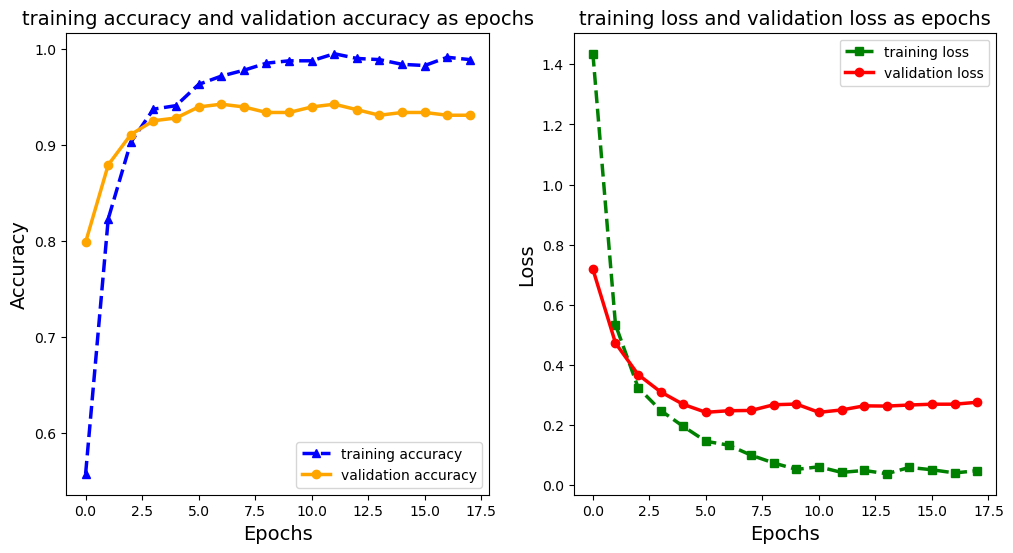

In [53]:
# plot fit model history (training accuracy as a function of epochs, and validation accuracy as epochs)

plt.figure(figsize = (12, 6), dpi = 100)  

plt.subplot(1, 2, 1)           

plt.plot(mobilenetv2_final_model.history["accuracy"], label = "training accuracy ", linestyle = "--", marker = "^",  linewidth = 2.5,  color = "blue")

plt.plot(mobilenetv2_final_model.history["val_accuracy"], label = "validation accuracy", linestyle = "-",marker = "o", linewidth = 2.5,  color = "orange")

plt.title("training accuracy and validation accuracy as epochs", fontsize = 14)
plt.xlabel("Epochs", fontsize = 14)
plt.ylabel("Accuracy", fontsize = 14)
plt.legend()

# plot fit model history (training loss as a function of epochs, and validation loss as epochs)


plt.subplot(1, 2, 2)
plt.plot(mobilenetv2_final_model.history["loss"], label = "training loss ", linestyle = "--", marker = "s", linewidth = 2.5,  color = "green")

plt.plot(mobilenetv2_final_model.history["val_loss"], label = "validation loss", linestyle = "-", marker = "o" , linewidth = 2.5,  color = "red")
plt.title("training loss and validation loss as epochs", fontsize = 14)
plt.xlabel("Epochs", fontsize = 14)
plt.ylabel("Loss", fontsize = 14)
plt.legend()

plt.show()



In [55]:
# MobileNetV2 (model) evaluation with the validation dataset

validation_loss, validation_accuracy, validation_precision, validation_recall = mobile_device_model.evaluate(validation_dataset_mobilenetv2)

# look at evaluation metrics
print(f"validation loss:, {validation_loss:.4f}")
print("\n")
print(f"validation accuracy:,  {validation_accuracy:.4f}")
print("\n")
print(f"precision in validation dataset:,  {validation_precision:.4f}")
print("\n")
print(f"recall in validation dataset:,  {validation_recall:.4f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 359ms/step - accuracy: 0.9290 - loss: 0.2653 - precision_1: 0.9360 - recall_1: 0.9201
validation loss:, 0.2427


validation accuracy:,  0.9397


precision in validation dataset:,  0.9420


recall in validation dataset:,  0.9339


In [ ]:
Do below 

## Evaluate the model on test images and find the test loss and accuracy.

In [58]:
# load images from "Test" folder
test_dataset_folder = image_dataset_from_directory(
    os.path.join(dataset_folder, "Test"),
    labels = None,
    image_size = (128, 128),
    shuffle = False,
    batch_size = 32
)

# normalize images in "test_dataset_folder"
test_dataset_folder_normalization = test_dataset_folder.map(lambda n: n/255.0)
print("normalize :", test_dataset_folder_normalization)


Found 300 files.
normalize : <_MapDataset element_spec=TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None)>


In [64]:

# prediction for test_dataset_folder_normalization 
mobile_device_model_prediction   = mobile_device_model.predict(test_dataset_folder_normalization)  # reult: number of samples,  number of classes)
print("prediction:", mobile_device_model_prediction )
print("\n")

10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 278ms/step
prediction: [[1.5778235e-03 1.4996558e-03 9.9421316e-01 ... 6.8625069e-04
  3.5497616e-04 1.0151820e-03]
 [8.5834105e-04 4.8463815e-05 3.0254436e-04 ... 2.2216714e-03
  1.0841123e-03 9.9446046e-01]
 [1.1992742e-04 3.6021379e-07 4.6793873e-05 ... 1.1877356e-05
  1.8749357e-05 9.9966884e-01]
 ...
 [1.1662356e-05 9.9975759e-01 1.9386609e-04 ... 1.2657260e-06
  4.9620771e-06 4.9194182e-07]
 [4.0357464e-04 1.0288201e-05 5.6267178e-05 ... 4.9551916e-05
  9.7861979e-05 9.9910420e-01]
 [9.4812160e-04 9.3781912e-01 5.5706751e-02 ... 3.0565885e-04
  1.1734148e-03 5.5081712e-04]]




In [66]:
# classes predictiones
classes_prediction = np.argmax(mobile_device_model_prediction, axis = 1)
print("classes prediction:", classes_prediction )

classes prediction: [2 8 8 1 8 6 8 6 4 1 4 1 6 6 8 4 6 8 8 8 8 8 4 8 2 8 8 4 4 6 6 4 6 1 8 8 6
 7 6 8 1 1 0 6 7 8 4 0 6 6 4 1 8 8 6 8 4 6 4 8 4 8 4 4 0 8 6 6 8 1 2 6 6 7
 8 8 4 6 2 8 4 4 4 2 8 4 2 1 6 4 1 6 8 6 1 8 6 6 6 8 4 0 6 2 4 6 2 8 8 0 1
 4 4 4 6 4 1 8 0 1 8 4 6 6 2 8 1 8 1 7 8 8 8 4 8 1 6 1 8 8 1 8 4 1 1 4 2 4
 8 4 8 8 8 8 4 4 4 4 6 8 8 8 6 6 8 8 1 4 8 6 8 8 8 1 1 6 8 6 6 6 4 6 6 8 3
 1 2 6 8 8 1 8 4 8 1 7 2 8 8 8 8 8 8 1 8 4 8 4 1 4 8 6 1 8 8 8 2 6 8 1 8 6
 8 2 8 8 4 8 7 8 7 8 8 4 8 4 4 1 8 8 8 6 1 0 8 8 1 6 7 8 4 1 1 7 1 6 8 4 6
 1 5 1 8 8 8 6 1 4 6 8 6 4 8 6 4 8 8 2 1 6 4 1 6 8 7 8 8 2 7 2 8 1 4 1 6 4
 6 1 8 1]


In [ ]:
."""
Conclusions

•	The project successfully showed the application of deep learning for automating image detection in port operations.
•	A CNN model was able to learn basic understandings but struggled to get high accuracy because of limited dataset size and sophistication.
•	The MobileNetV2 model showed higher validation performance, highlighting the strength of pretrained models on small datasets.
•	Evaluation metrics showed class imbalance and data limitations which are key hurdles that affected the foundational CNN.
•	Transfer learning improved accuracy as well as offered better generalization and stability for unseen test data.
•	The overall workflow established a foundation for scaling AI solutions used in industrial port automation, and transfer learning being 
the recommended approach for deployment.

"""